**CHAPTER 3 Cloud Computing (Landing zone data lake)**

**3.1 Coding Python by Python SDK library**

In [ ]:
from google.cloud import storage
def upload_blob(bucket_name, source_file_name, destination_blob_name):
    """Uploads a file to the bucket."""
    # The ID of your GCS bucket
    # bucket_name = "your-bucket-name"
    # The path to your file to upload
    # source_file_name = "local/path/to/file"
    # The ID of your GCS object
    # destination_blob_name = "storage-object-name"
    storage_client = storage.Client()
    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(destination_blob_name)
    # Optional: set a generation-match precondition to avoid potential race conditions
    # and data corruptions. The request to upload is aborted if the object's
    # generation number does not match your precondition. For a destination
    # object that does not yet exist, set the if_generation_match precondition to 0.
    # If the destination object already exists in your bucket, set instead a
    # generation-match precondition using its generation number.
    generation_match_precondition = 0
    blob.upload_from_filename(source_file_name, if_generation_match=generation_match_precondition)
    print(
        f"File {source_file_name} uploaded to {destination_blob_name}."
    )
def download_blob(bucket_name, source_blob_name, destination_file_name):
    """Downloads a blob from the bucket."""
    # The ID of your GCS bucket
    # bucket_name = "your-bucket-name"
    # The ID of your GCS object
    # source_blob_name = "storage-object-name"
    # The path to which the file should be downloaded
    # destination_file_name = "local/path/to/file"
    storage_client = storage.Client()
    bucket = storage_client.bucket(bucket_name)
    # Construct a client side representation of a blob.
    # Note `Bucket.blob` differs from `Bucket.get_blob` as it doesn't retrieve
    # any content from Google Cloud Storage. As we don't need additional data,
    # using `Bucket.blob` is preferred here.
    blob = bucket.blob(source_blob_name)
    blob.download_to_filename(destination_file_name)
    print(
        "Downloaded storage object {} from bucket {} to local file {}.".format(
            source_blob_name, bucket_name, destination_file_name
        )
    )
if __name__ == "__main__":
    mode = input("Upload (u) or Download (d)?")
    bucket_name = input("Plase enter bucket name:")
    source_file = input("Please enter source file:")
    destination = input("Please enter destination file (leave blank if use the same name):")
    # r2de-workshops
    if destination is None or destination == "":
        destination = source_file.split("/")[-1]
    if mode.strip().lower() == "upload" or mode.strip().lower() == "u":
        upload_blob(bucket_name, source_file, destination)
    elif mode.strip().lower() == "download" or mode.strip().lower() == "d":
        download_blob(bucket_name, source_file, destination)
    else:
        print("invalid command")

Create bucket

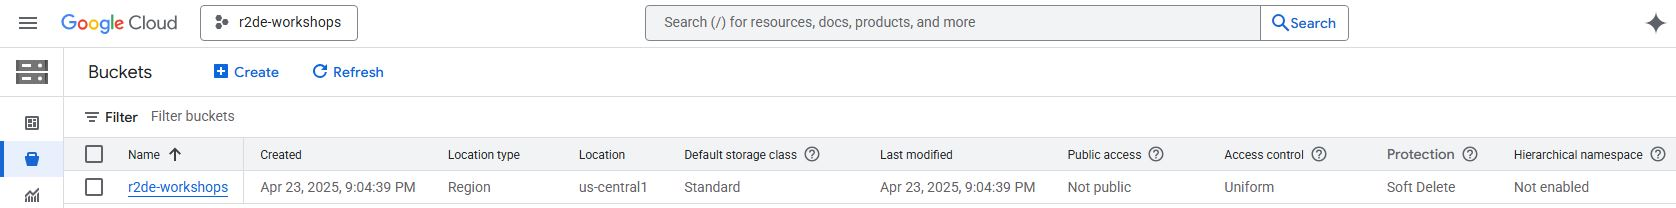

Upload file to bucket

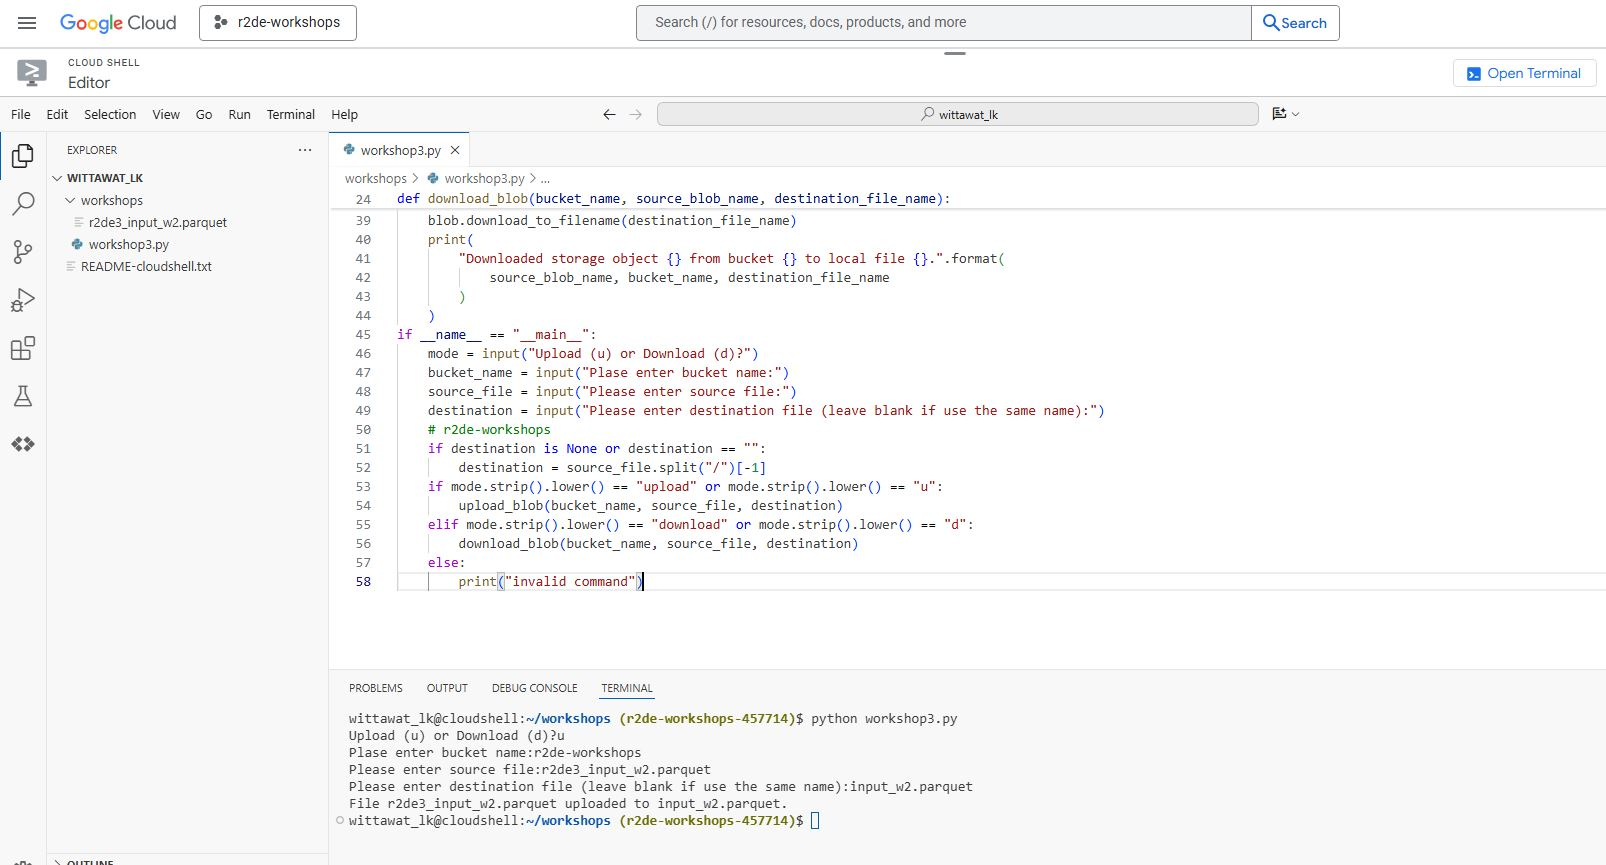

Show the result file in the bucket

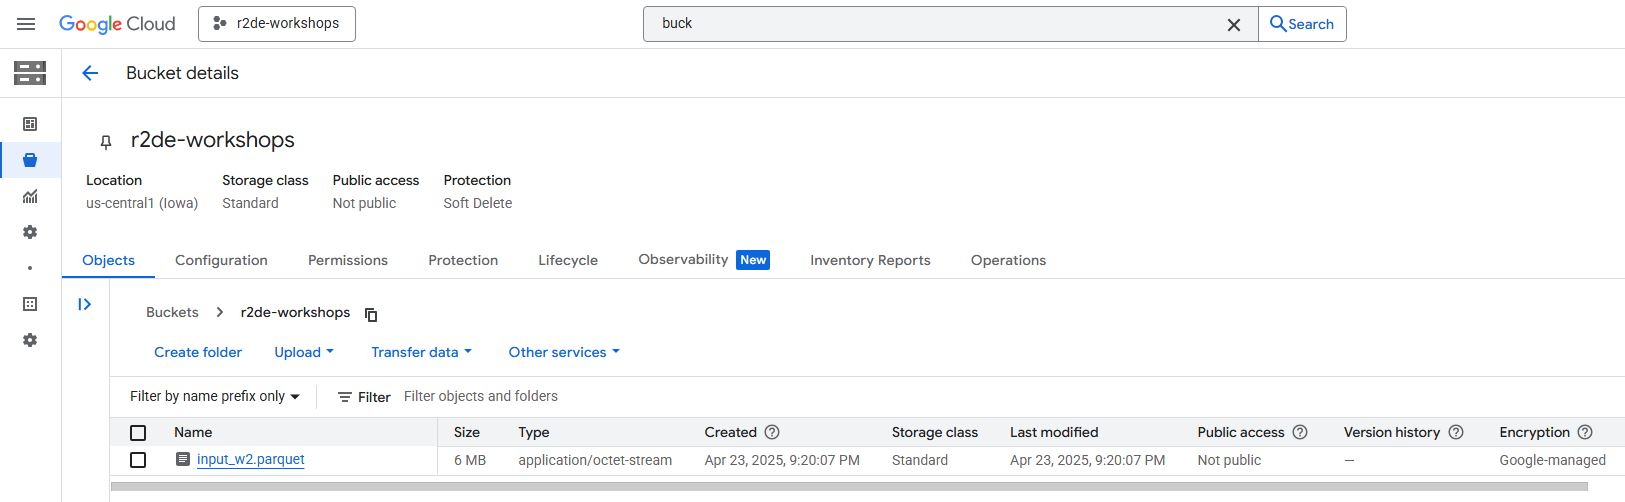

Download file to the folder

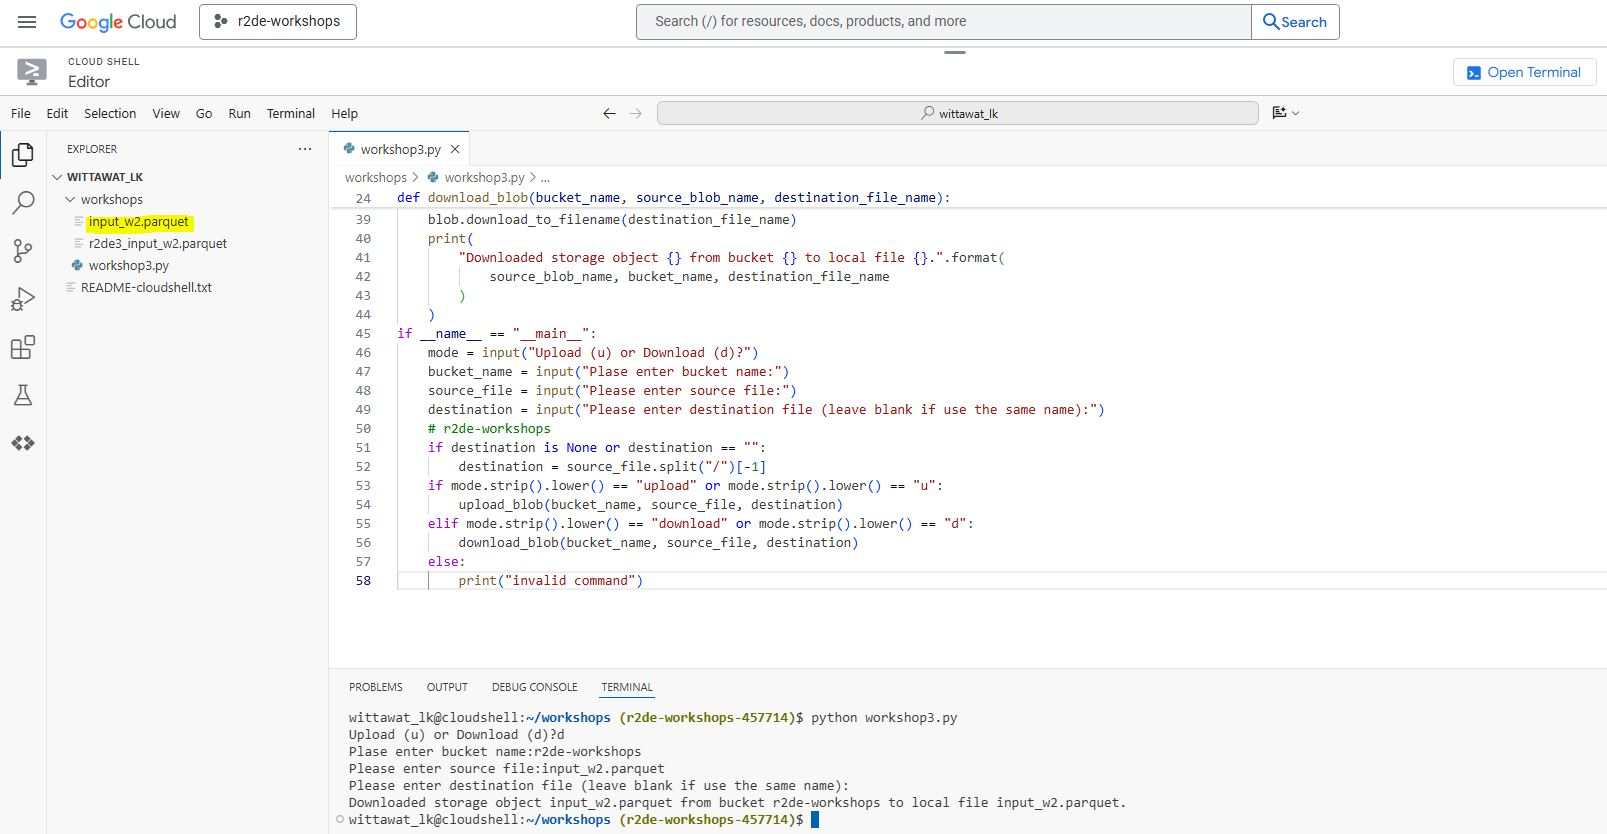